<a href="https://colab.research.google.com/github/gaeun120312/Deeplearning/blob/main/21_%EC%84%A4%EB%AA%85%EA%B0%80%EB%8A%A5%ED%95%9C_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%AA%A8%EB%8D%B8_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tf-explain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.6 MB/s eta 0:00:00


Cloning into 'data'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 21 (delta 3), reused 20 (delta 2), pack-reused 0
Receiving objects: 100% (21/21), 460.95 KiB | 2.29 MiB/s, done.
Resolving deltas: 100% (3/3), done.


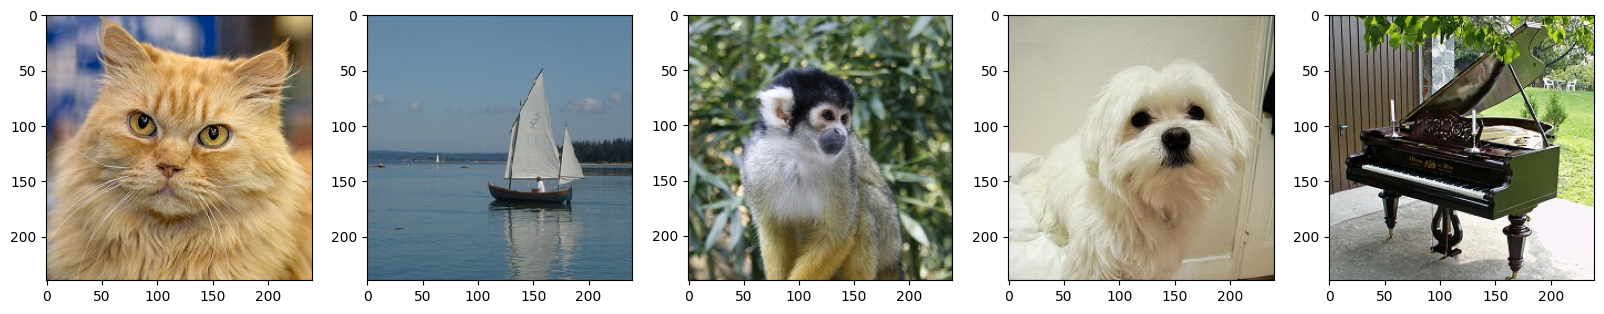

In [24]:
# Gradient CAM
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16

from tf_explain.core.grad_cam import GradCAM
# 폐쇄성 민감도 방식 처리 함수
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity

# 이미지 불러와 보여주는 라이브러리
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

!git clone https://github.com/taehojo/data.git

# 원본 이미지가 들어갈 리스트
images_originals = []

# 원본 이미지가 저장된 폴더에서 하나씩 불러와 리스트에 넣음
for img_path in glob.glob('/content/data/img/*_0.jpg'):
  images_originals.append(mpimg.imread(img_path))

# 코랩에서 보여줄 이미지의 크기
plt.figure(figsize=(20, 20))
# 원본 이미지를 코랩에서 보이게 하기

for i, image_o in enumerate(images_originals):
  plt.subplot(5, 5, i+1)
  plt.imshow(image_o)

# 사전에 학습된 딥러닝 모델 불러오기
model = VGG16(weights="imagenet", include_top=True)

# 원본 이미지 이름과 Imagenet에서의 해당 이미지 인덱스
input_list =  ["maltese", "persian_cat", "squirrel_monkey", "grand_piano", "yawl"]
imagenet_index = ["153", "283", "382", "579", "914"]


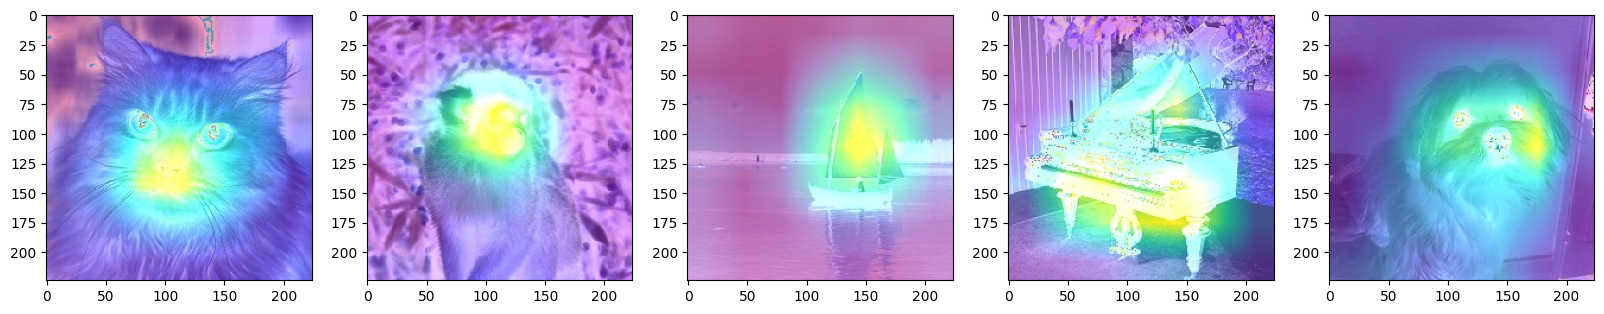

In [28]:
# 그레디언트 CAM 알고리즘 선택
explainer = GradCAM()

# 그레디언트 CAM 알고리즘이 적용된 이미지가 들어갈 빈 리스트 만들기
images_cams = []

# 그레디언트 CAM 알고리즘 실행
for l, i in zip(input_list, imagenet_index):
  # 이미지를 불러오고 내부에서 처리될 이미지의 크기 설정
  img = load_img('/content/data/img/{}_0.jpg'.format(l), target_size=(224, 224))
  img = img_to_array(img)
  data = ([img], None)

  grid = explainer.explain(data, model, int(i))
  explainer.save(grid, ".", '/content/data/img/{}_cam.jpg'.format(l))

plt.figure(figsize=(20, 20))

for img_path in glob.glob('/content/data/img/*_cam.jpg'):
  images_cams.append(mpimg.imread(img_path))

for i, image_c in enumerate(images_cams):
  plt.subplot(5, 5, i+1)
  plt.imshow(image_c)

2/2 [==============================] - 23s 2s/step


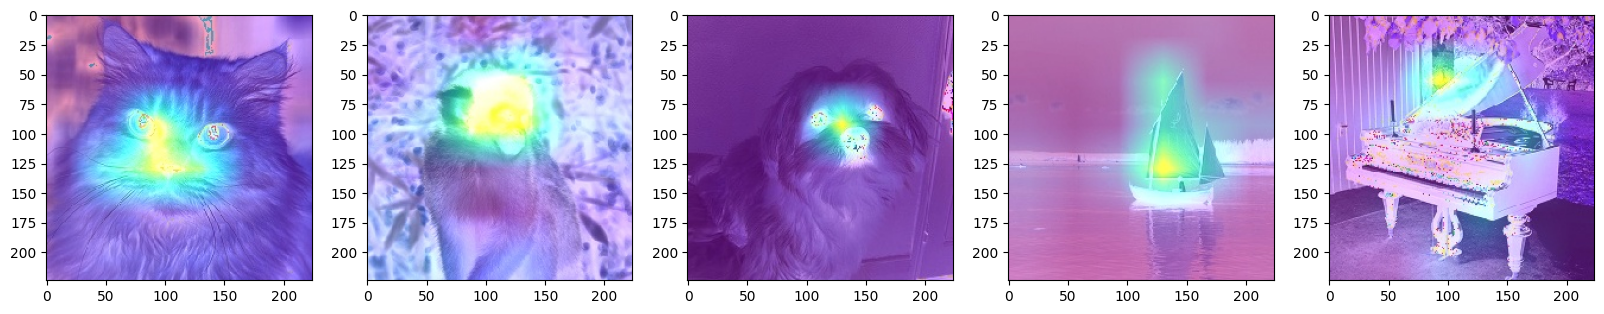

In [29]:
# 오클루전 알고리즘 선택
explainer = OcclusionSensitivity()

# 알고리즘이 적용된 이미지가 들어갈 빈 리스트
images_occ1s = []

# 패치 크기 정하기
patch_size = 40

# 오클루전 알고리즘 실행
for l, i in zip(input_list, imagenet_index):
  img = load_img('/content/data/img/{}_0.jpg'.format(l), target_size=(224,224))
  img = img_to_array(img)
  data = ([img], None)

  # 패치 크기 설정 추가
  grid = explainer.explain(data, model, int(i), patch_size)
  explainer.save(grid, ".", '/content/data/img/{}_occ1.jpg'.format(l))

plt.figure(figsize=(20, 20))

for img_path in glob.glob('/content/data/img/*occ1.jpg'):
  images_occ1s.append(mpimg.imread(img_path))

for i, image in enumerate(images_occ1s):
  plt.subplot(5, 5, i+1)
  plt.imshow(image)